## Manhattan plot for publication

In [27]:
library('tidyr')
library('dplyr')
library('ggplot2')
library('ggrepel')


In [28]:
#Load your data
gwas <- read.table(gzfile('/home/dmc2245/UKBiobank/results/REGENIE_results/results_exome_data/090921_f3393_hearing_aid_200K/090321_UKBB_Hearing_aid_f3393_expandedwhite_6436cases_96601ctrl_PC1_2_f3393.regenie.snp_stats.gz'),sep='\t', header=T)

In [29]:
head(gwas)
nrow(gwas)

,CHR,POS,REF,ALT,SNP,BETA,SE,P
,<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,1,925862,G,A,chr1:925862:G:A,-1.425140,1.279590,0.26538966
2,1,925881,G,A,chr1:925881:G:A,-0.236930,0.142267,0.09583408
3,1,925885,C,T,chr1:925885:C:T,-1.065500,2.232200,0.63312433
4,1,925908,G,GGCTCT,chr1:925908:G:GGCTCT,1.601750,1.651090,0.33198847
5,1,925915,C,T,chr1:925915:C:T,0.865111,1.417950,0.54178628
6,1,925928,G,A,chr1:925928:G:A,4.247600,2.319020,0.06700697


[1] 3029153

In [30]:
annot <- read.csv("/home/dmc2245/UKBiobank/results/REGENIE_results/results_exome_data/090921_f3393_hearing_aid_200K/090321_UKBB_Hearing_aid_f3393_expandedwhite_6436cases_96601ctrl_PC1_2_f3393.regenie.hg38_multianno.formatted.csv")

In [31]:
head(annot)

,alternate_id,BETA,SE,P,Chr,Start,End,Ref,Alt,Func.refGene,...,CLNDISDB,CLNREVSTAT,CLNSIG,DN.ID,Patient.ID,Phenotype,Platform,Study,Pubmed.ID,Otherinfo1
,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,5:272741:A:G,1.789340,0.2505260,7.055048e-11,5,272741,272741,A,G,exonic,...,.,.,.,.,.,.,.,.,.,5:272741:A:G 1.78934 0.250526 7.05504844050652e-11
2,5:272748:G:C,1.698750,0.2796450,2.479648e-08,5,272748,272748,G,C,exonic,...,.,.,.,.,.,.,.,.,.,5:272748:G:C 1.69875 0.279645 2.4796478021407e-08
3,5:272755:A:G,1.708990,0.2425330,1.335826e-10,5,272755,272755,A,G,exonic,...,.,.,.,.,.,.,.,.,.,5:272755:A:G 1.70899 0.242533 1.33582633172893e-10
4,5:73776529:T:C,0.110401,0.0192355,9.986884e-09,5,73776529,73776529,T,C,exonic,...,MedGen:CN169374,criteria_provided\x2c_single_submitter,Benign,.,.,.,.,.,.,5:73776529:T:C 0.110401 0.0192355 9.98688387413657e-09
5,5:73780632:G:A,0.106506,0.0193474,3.872398e-08,5,73780632,73780632,G,A,intronic,...,.,.,.,.,.,.,.,.,.,5:73780632:G:A 0.106506 0.0193474 3.87239811458644e-08
6,5:73780686:C:A,0.111361,0.0192423,7.300792e-09,5,73780686,73780686,C,A,exonic;splicing,...,MedGen:CN169374,criteria_provided\x2c_single_submitter,Benign,.,.,.,.,.,.,5:73780686:C:A 0.111361 0.0192423 7.30079241116744e-09


In [32]:
annot <- annot %>%
    select("alternate_id", "Gene.refGene", "avsnp150") %>%
    separate("Gene.refGene", "Gene") %>%
    rename(SNP = alternate_id)

Warning message:
“Expected 1 pieces. Additional pieces discarded in 1 rows [6].”


In [33]:
annot$SNP<-sub("^","chr",annot$SNP)

In [34]:
head(annot)

,SNP,Gene,avsnp150
,<chr>,<chr>,<fct>
1,chr5:272741:A:G,PDCD6,rs537688122
2,chr5:272748:G:C,PDCD6,rs549592074
3,chr5:272755:A:G,PDCD6,rs571370281
4,chr5:73776529:T:C,ARHGEF28,rs7714670
5,chr5:73780632:G:A,ARHGEF28,rs11949860
6,chr5:73780686:C:A,ARHGEF28,rs6453022


In [35]:
snpsOfInterest <- gwas %>%
    filter(P<5e-08)

In [36]:
head(snpsOfInterest)

,CHR,POS,REF,ALT,SNP,BETA,SE,P
,<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,5,272741,A,G,chr5:272741:A:G,1.789340,0.2505260,7.055048e-11
2,5,272748,G,C,chr5:272748:G:C,1.698750,0.2796450,2.479648e-08
3,5,272755,A,G,chr5:272755:A:G,1.708990,0.2425330,1.335826e-10
4,5,73776529,T,C,chr5:73776529:T:C,0.110401,0.0192355,9.986884e-09
5,5,73780632,G,A,chr5:73780632:G:A,0.106506,0.0193474,3.872398e-08
6,5,73780649,GT,G,chr5:73780649:GT:G,0.112679,0.0194329,7.029914e-09


In [37]:
snps_annot <- merge(snpsOfInterest,annot,by="SNP")

In [66]:
snps_annot

SNP,CHR,POS,REF,ALT,BETA,SE,P,Gene,avsnp150
<fct>,<int>,<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
chr5:272741:A:G,5,272741,A,G,1.789340,0.2505260,7.055048e-11,PDCD6,rs537688122
chr5:272748:G:C,5,272748,G,C,1.698750,0.2796450,2.479648e-08,PDCD6,rs549592074
chr5:272755:A:G,5,272755,A,G,1.708990,0.2425330,1.335826e-10,PDCD6,rs571370281
chr5:73776529:T:C,5,73776529,T,C,0.110401,0.0192355,9.986884e-09,ARHGEF28,rs7714670
chr5:73780632:G:A,5,73780632,G,A,0.106506,0.0193474,3.872398e-08,ARHGEF28,rs11949860
chr5:73780686:C:A,5,73780686,C,A,0.111361,0.0192423,7.300792e-09,ARHGEF28,rs6453022
chr5:73794436:T:C,5,73794436,T,C,0.110775,0.0192598,8.822060e-09,ARHGEF28,rs7716253
chr5:73795301:T:A,5,73795301,T,A,0.109600,0.0192188,1.226168e-08,ARHGEF28,rs2973549
chr5:73795403:C:T,5,73795403,C,T,0.107065,0.0192138,2.606574e-08,ARHGEF28,rs2973548


In [70]:
 # Prepare the dataset
  don <- gwas %>% 
  
  # Compute chromosome size
  group_by(CHR) %>% 
  summarise(chr_len=max(POS)) %>%
  # Calculate cumulative position of each chromosome
  mutate(tot=cumsum(as.numeric(chr_len))- as.numeric(chr_len)) %>%
  select(-chr_len) %>%
      
  # Add this info to the initial dataset
  left_join(gwas, ., by=c("CHR"="CHR")) %>%
  
  # Add a cumulative position of each SNP
  arrange(CHR, POS) %>%
  mutate(BPcum=POS+tot) %>%
    
  # Add highlight and annotation information
  mutate(is_highlight=ifelse(SNP %in% snpsOfInterest$SNP, "yes", "no")) %>%
  mutate(is_annotate=ifelse(P<5E-08, "yes", "no")) %>%
   
  # Filter SNP to make the plot lighter
  filter(-log10(P)>0.5)

In [71]:
don_anno <- merge(x = don, y = snps_annot[ , c("SNP", "Gene", "avsnp150")], by = "SNP", all.x=TRUE)

In [72]:
axisdf = don %>% group_by(CHR) %>% summarize(center=( max(BPcum) + min(BPcum) ) / 2 )

In [75]:
don_anno[don_anno$is_annotate == "yes", ] 

,SNP,CHR,POS,REF,ALT,BETA,SE,P,tot,BPcum,is_highlight,is_annotate,Gene,avsnp150
,<fct>,<int>,<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>
612414,chr5:272741:A:G,5,272741,A,G,1.789340,0.2505260,7.055048e-11,879014974,879287715,yes,yes,PDCD6,rs537688122
612415,chr5:272748:G:C,5,272748,G,C,1.698750,0.2796450,2.479648e-08,879014974,879287722,yes,yes,PDCD6,rs549592074
612416,chr5:272755:A:G,5,272755,A,G,1.708990,0.2425330,1.335826e-10,879014974,879287729,yes,yes,PDCD6,rs571370281
619166,chr5:73776529:T:C,5,73776529,T,C,0.110401,0.0192355,9.986884e-09,879014974,952791503,yes,yes,ARHGEF28,rs7714670
619169,chr5:73780632:G:A,5,73780632,G,A,0.106506,0.0193474,3.872398e-08,879014974,952795606,yes,yes,ARHGEF28,rs11949860
619170,chr5:73780649:GT:G,5,73780649,GT,G,0.112679,0.0194329,7.029914e-09,879014974,952795623,yes,yes,NA,NA
619171,chr5:73780686:C:A,5,73780686,C,A,0.111361,0.0192423,7.300792e-09,879014974,952795660,yes,yes,ARHGEF28,rs6453022
619174,chr5:73794436:T:C,5,73794436,T,C,0.110775,0.0192598,8.822060e-09,879014974,952809410,yes,yes,ARHGEF28,rs7716253
619177,chr5:73795301:T:A,5,73795301,T,A,0.109600,0.0192188,1.226168e-08,879014974,952810275,yes,yes,ARHGEF28,rs2973549


Warning message:
“Removed 1 rows containing missing values (geom_label_repel).”


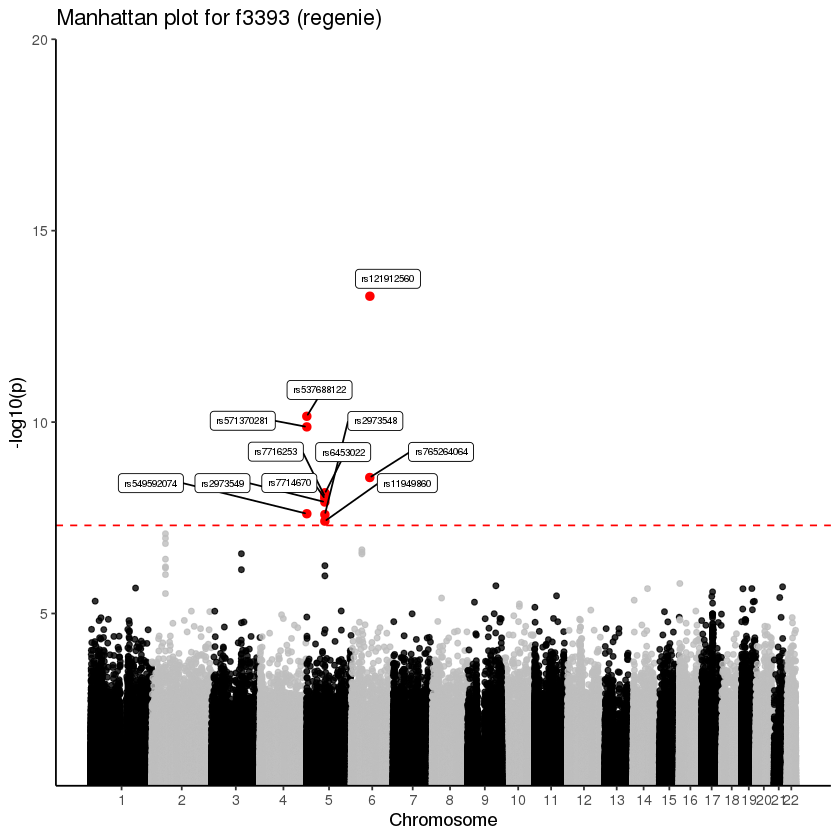

In [108]:
sig <- 5e-8
y_limits <- c(8, NA)

ggplot(don_anno, aes(x=BPcum, y=-log10(P))) +
    
    # Show all points
    geom_point( aes(color=as.factor(CHR)), alpha=0.8, size=1.3) +
    scale_color_manual(values = rep(c("black", "grey"), 22 )) +
    
    # custom X axis:
    scale_x_continuous(label = axisdf$CHR, breaks= axisdf$center ) +
    scale_y_continuous(expand = c(0, 0), limits=c(NA, 20)) +   # remove space between plot area and x axis
    
    # Add highlighted points
    geom_point(data=subset(don_anno, is_highlight=="yes"), color="red", size=2) +
    
    # Add label using ggrepel to avoid overlapping
    geom_label_repel( data=subset(don_anno, is_annotate=="yes"), aes(label=avsnp150), size=2,  max.overlaps = Inf, ylim = y_limits) +

    # Add significance level line

    geom_hline(yintercept = -log10(sig), color = "red1", linetype = "dashed") +

    #create X and Y axes labels
    labs(x = "Chromosome",
         y = "-log10(p)",
         title ='Manhattan plot for f3393 (regenie)') +
    
    # Custom the theme:
    theme_classic() +
    theme( 
      legend.position="none",
      panel.border = element_blank(),
      panel.grid.major.x = element_blank(),
      panel.grid.minor.x = element_blank()
    )

In [110]:
ylim <- abs(floor(log10(min(don$P))))

In [111]:
ylim

[1] 14

In [120]:
head(anno)

,alternate_id,BETA,SE,P,Chr,Start,End,Ref,Alt,Func.refGene,...,CLNDISDB,CLNREVSTAT,CLNSIG,DN.ID,Patient.ID,Phenotype,Platform,Study,Pubmed.ID,Otherinfo1
,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,5:272741:A:G,1.789340,0.2505260,7.055048e-11,5,272741,272741,A,G,exonic,...,.,.,.,.,.,.,.,.,.,5:272741:A:G 1.78934 0.250526 7.05504844050652e-11
2,5:272748:G:C,1.698750,0.2796450,2.479648e-08,5,272748,272748,G,C,exonic,...,.,.,.,.,.,.,.,.,.,5:272748:G:C 1.69875 0.279645 2.4796478021407e-08
3,5:272755:A:G,1.708990,0.2425330,1.335826e-10,5,272755,272755,A,G,exonic,...,.,.,.,.,.,.,.,.,.,5:272755:A:G 1.70899 0.242533 1.33582633172893e-10
4,5:73776529:T:C,0.110401,0.0192355,9.986884e-09,5,73776529,73776529,T,C,exonic,...,MedGen:CN169374,criteria_provided\x2c_single_submitter,Benign,.,.,.,.,.,.,5:73776529:T:C 0.110401 0.0192355 9.98688387413657e-09
5,5:73780632:G:A,0.106506,0.0193474,3.872398e-08,5,73780632,73780632,G,A,intronic,...,.,.,.,.,.,.,.,.,.,5:73780632:G:A 0.106506 0.0193474 3.87239811458644e-08
6,5:73780686:C:A,0.111361,0.0192423,7.300792e-09,5,73780686,73780686,C,A,exonic;splicing,...,MedGen:CN169374,criteria_provided\x2c_single_submitter,Benign,.,.,.,.,.,.,5:73780686:C:A 0.111361 0.0192423 7.30079241116744e-09


In [ ]:
# Create a subset of the data with variants with P< 0.05 and arrange by chromosome number
# https://danielroelfs.com/blog/how-i-create-manhattan-plots-using-ggplot/
sig.dat <- data %>%
  subset(P < 0.05) %>%
  arrange (CHR, .by_group=TRUE)
# Add highlight and annotation information
#mutate( is_highlight=ifelse(SNP %in% index_snps, "yes", "no")) %>%
#mutate( is_annotate=ifelse(-log10(P_BOLT_LMM)>6, "yes", "no"))
# Check the list of chromosomes (make sure the sex chr are at the end of the list)
# Get the cumulative base pair position for each variant
nCHR <- length(unique(sig.dat$CHR))
sig.dat$BPcum <- NA
s <- 0
nbp <- c()
for (i in unique(sig.dat$CHR)){
  nbp[i] <- max(sig.dat[sig.dat$CHR == i,]$POS)
  sig.dat[sig.dat$CHR == i,"BPcum"] <- sig.dat[sig.dat$CHR == i,"POS"] + s
  s <- s + nbp[i]
}

# Calculate the mid point for each chromosome for plotting the x-axis
# Calculate the y-lim

axis.set <- sig.dat %>%
  group_by(CHR) %>%
  summarize(center = (max(BPcum) + min(BPcum)) / 2)
if (20 == 0) ylim <- abs(floor(log10(min(sig.dat$P)))) + 2
sig <- 5e-8

# Now time to draw the manhattan plot without filtering the most significant signals
manhplot <- ggplot(sig.dat, aes(x = BPcum, y = -log10(P),
                             color = as.factor(CHR), size = -log10(P))) +
  geom_point(alpha = 0.75) +
  geom_hline(yintercept = -log10(sig), color = "red1", linetype = "dashed") +
  scale_x_continuous(label = axis.set$CHR, breaks = axis.set$center) +
  scale_y_continuous(expand = c(0,0), limits = c(NA, ylim)) +
  scale_color_manual(values = rep(c("#276FBF", "#183059"), nCHR)) +
  scale_size_continuous(range = c(0.5,3)) +
  # Add highlighted points
  # geom_point(data=subset(sig.dat, is_highlight=="yes"), color="orange", alpha=0.75) +
  labs(x = "Chromosome",
       y = "-log10(p)",
       title ='Manhattan plot for f3393 (regenie)') +
  theme_classic() +
  theme(
    legend.position = "none",
    panel.border = element_blank(),
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    axis.text.x = element_text(angle = 90, size = 8, vjust = 0.5)
  )

# To save a plot created with ggplot2 you have to use to print() function

png('/home/dmc2245/UKBiobank/results/REGENIE_results/results_exome_data/090921_f3393_hearing_aid_200K/090321_UKBB_Hearing_aid_f3393_expandedwhite_6436cases_96601ctrl_PC1_2_f3393.regenie.manhattan_annotated.png', width = 6, height = 4, unit='in', res=300)
print(manhplot)
dev.off()

# save significant data to a file for further evaluations
tmp = sig.dat[,c('CHR', 'POS', 'BPcum', 'SNP', 'P')]
colnames(tmp) = c('CHR', 'POS', 'POScum', 'SNP', 'pvalue')
saveRDS(list(data = tmp,
             ylim = abs(floor(log10(min(sig.dat$P)))) + 2,
             axis.set = axis.set), '/home/dmc2245/UKBiobank/results/REGENIE_results/results_exome_data/090921_f3393_hearing_aid_200K/090321_UKBB_Hearing_aid_f3393_expandedwhite_6436cases_96601ctrl_PC1_2_f3393.regenie.plot_data.rds')

In [8]:

sos dryrun /home/dmc2245/project/bioworkflows/GWAS/LMM.ipynb \
    regenie:4\
    --cwd /home/dmc2245/test\
    --bfile /home/dmc2245/UKBiobank/genotype_files_processed/090221_sample_variant_qc_final_callrate90/cache/UKB_genotypedatadownloaded083019.090221_sample_variant_qc_final_callrate90.filtered.extracted.bed \
    --genoFile /home/dmc2245/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c1.merged.filtered.bed /home/dmc2245/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c2.merged.filtered.bed /home/dmc2245/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c3.merged.filtered.bed /home/dmc2245/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c4.merged.filtered.bed /home/dmc2245/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c5.merged.filtered.bed /home/dmc2245/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c6.merged.filtered.bed /home/dmc2245/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c7.merged.filtered.bed /home/dmc2245/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c8.merged.filtered.bed /home/dmc2245/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c9.merged.filtered.bed /home/dmc2245/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c10.merged.filtered.bed /home/dmc2245/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c11.merged.filtered.bed /home/dmc2245/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c12.merged.filtered.bed /home/dmc2245/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c13.merged.filtered.bed /home/dmc2245/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c14.merged.filtered.bed /home/dmc2245/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c15.merged.filtered.bed /home/dmc2245/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c16.merged.filtered.bed /home/dmc2245/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c17.merged.filtered.bed /home/dmc2245/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c18.merged.filtered.bed /home/dmc2245/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c19.merged.filtered.bed /home/dmc2245/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c20.merged.filtered.bed /home/dmc2245/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c21.merged.filtered.bed /home/dmc2245/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c22.merged.filtered.bed\
    --phenoFile /home/dmc2245/UKBiobank/phenotype_files/hearing_impairment/090321_UKBB_Hearing_aid_f3393_expandedwhite_6436cases_96601ctrl_PC1_2.tsv \
    --formatFile /home/dmc2245/project/UKBB_GWAS_dev/data/regenie_template.yml \
    --phenoCol f3393\
    --covarCol sex  \
    --qCovarCol age PC1 PC2\
    --bsize 1000\
    --lowmem_dir /home/dmc2245/scratch60/predictions\
    --trait bt \
    --bgenMinMAF 0.001 \
    --bgenMinINFO 0.8\
    --maf_filter 0\
    --geno_filter 0\
    --hwe_filter 0\
    --mind_filter 0\
    --minMAC 4\
    --job_size 1\
    --ylim 20\
    --reverse_log_p True\
    --numThreads 20\
    --label_annotate SNP \
    --container_lmm /home/dmc2245/containers/lmm.sif\
    --container_marp /home/dmc2245/containers/marp.sif\
    -s build

INFO: Checking regenie_4: Manhattan and QQ plots using `qqman`
ERROR: [regenie_4]: [regenie_4]: Failed to process step output (manhattan = f'{_input[0]:nn}.manhattan.png',
        qq = f'{_input[0]:nn}.qq.png',
        annotated_manhattan = f'{_input[0]:nn}.manhattan_annotated.png',
        analysis_summary = f'{_input[0]:nn}.analysis_summary.md',
        plot_data = f'{_input[0]:nn}.plot_data.rds'): list index out of range


: 1